# Artificial Neural Network using Tensorflow for Churn Modelling

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

EXPLORATORY DATA ANALYSIS

In [31]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

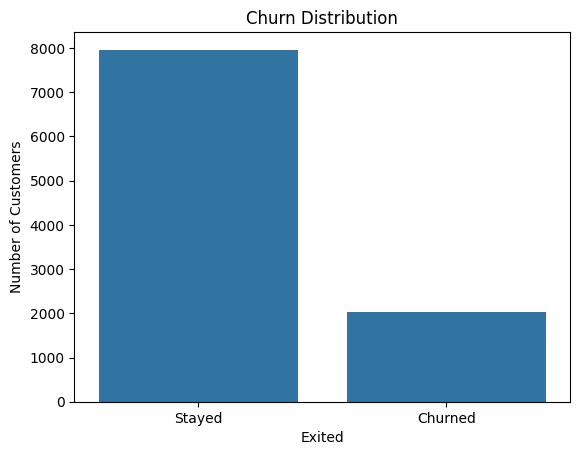

In [33]:
#1. CHURN DISTRIBUTION
sns.countplot(x='Exited', data=dataset)
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.ylabel('Number of Customers')
plt.show()

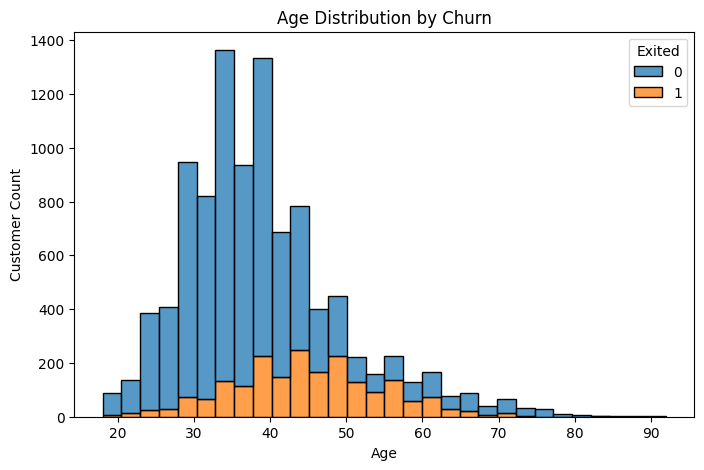

In [37]:
# 2. AGE VS CHURN
plt.figure(figsize=(8,5))
sns.histplot(data=dataset, x='Age', hue='Exited', multiple='stack', bins=30)
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.ylabel('Customer Count')
plt.show()

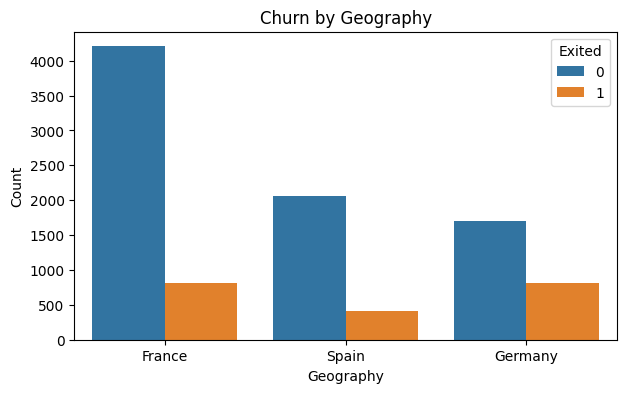

In [38]:
#3. GEOGRAPHY VS CHURN
plt.figure(figsize=(7,4))
sns.countplot(x='Geography', hue='Exited', data=dataset)
plt.title('Churn by Geography')
plt.ylabel('Count')
plt.show()

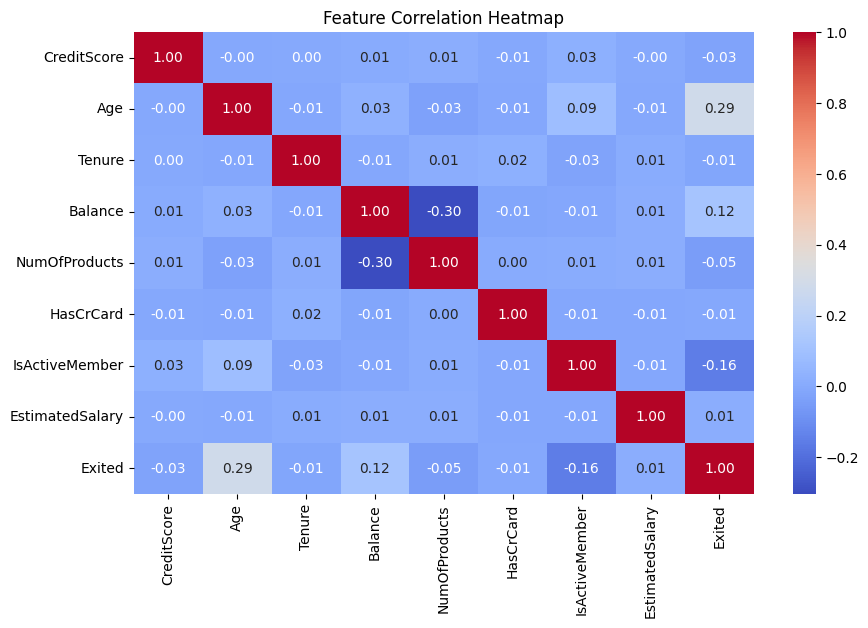

In [40]:
#4. CORRELATION HEATMAP
plt.figure(figsize=(10,6))
corr = dataset.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

DATA PREPROCESSING

In [30]:
dataset = pd.read_csv('Churn_Modelling.csv')
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [4]:
print(y)

[1 0 1 ... 1 1 0]


Encoding categorical data

In [5]:
#Label encoding Gender Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

In [6]:
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [7]:
#One-Hot Encoding the COuntry column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [8]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Feature Scaling



In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

BUILDING THE ANN

In [12]:
#initializing the ann
ann = tf.keras.models.Sequential()
#adding the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [13]:
#adding second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [14]:
#adding output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

TRAINING THE ANN

In [15]:
ann.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
#training ann on training set
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7433 - loss: 0.5790
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7973 - loss: 0.4562
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8050 - loss: 0.4349
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8113 - loss: 0.4271
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8240 - loss: 0.4113
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8203 - loss: 0.4009
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8261 - loss: 0.3921
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8181 - loss: 0.3994
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8266 - loss: 0.3920
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8240 - loss: 0.3844
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8331 - loss: 0.3749
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

PREDICTIONS

EXAMPLE:
USING ANN MODEL TO PREDICT IF THE CUSTOMER WITH THE FOLLOWING INFORMATION WILL LEAVE THE BANK:
GEOGRAPHY - FRANCE

CREDIT SCORE - 600

GENDER - MALE

AGE - 40 YRS OLD

TENURE - 3 YRS

BALANCE - $60000

NO OF PRODUCTS - 2

CREDIT CARD - YES

ACTIVE MEMBER - YES

EST. SALARY - $50000

In [18]:
#solution
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
[[False]]


In [19]:
#predicitng the test set
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [21]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1511   84]
 [ 200  205]]


0.858

In [22]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.51      0.59       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



ROC CURVE AND AUC SCORE

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


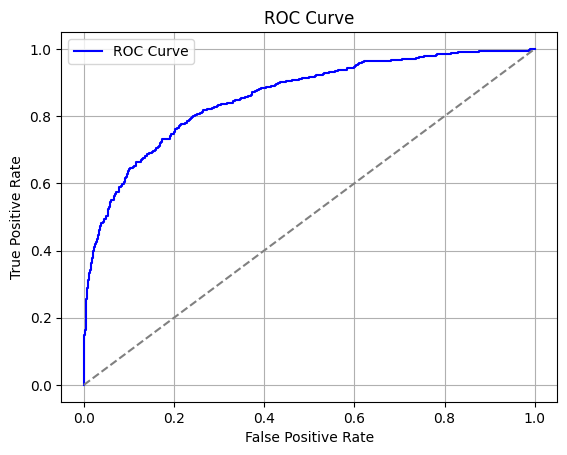

AUC Score: 0.8584558225937535


In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
#pred prob
y_probs = ann.predict(x_test)

#roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# AUC Score
auc = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc)

TRAINING RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [25]:
# Predict and evaluate
y_pred_rf = rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)[:, 1]  # for AUC

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Accuracy:", round(acc_rf * 100, 2), "%")
print("Random Forest AUC Score:", round(auc_rf, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 86.6 %
Random Forest AUC Score: 0.8662

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.74      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [28]:
sample = [[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]

# Scale the input using the same StandardScaler used before
sample_scaled = sc.transform(sample)

# Predict using Random Forest
prediction_rf = rf.predict(sample_scaled)
print("Random Forest Prediction:", prediction_rf[0])

Random Forest Prediction: 0


ROC Curve for Random Forest

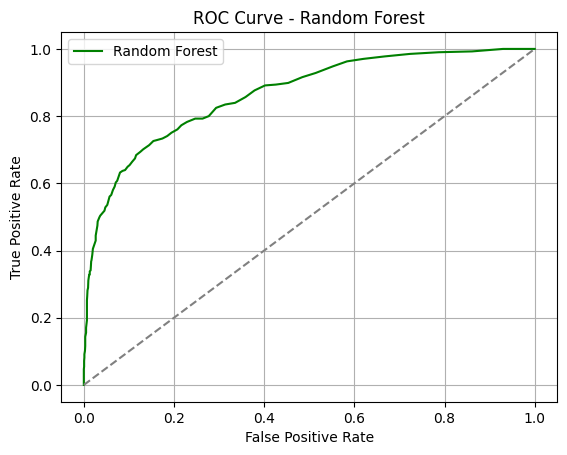

In [29]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()
